!pip uninstall torch torchvision -y
!pip install torch==1.8.1 torchvision==0.9.1 torchtext==0.9.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install accelerate

!pip install transformers -U

In [ ]:
!pip install modin

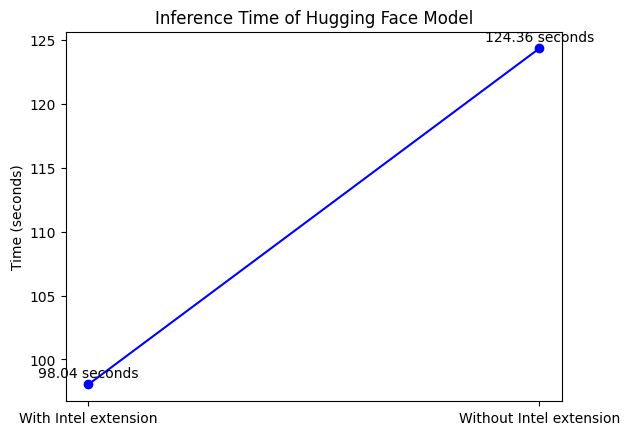

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have two time variables, let's call them time1 and time2
time1 = 98.04223680496216  # Replace this with your actual time variable
time2 = 124.3553466796875  # Replace this with your actual time variable

# Visual representation
labels = ['With Intel extension', 'Without Intel extension']
times = [time1, time2]

plt.plot(labels, times, marker='o', linestyle='-', color='b')
plt.ylabel('Time (seconds)')
plt.title('Inference Time of Hugging Face Model')

# Add annotations for the actual time values
for label, time_value in zip(labels, times):
    plt.annotate(f'{time_value:.2f} seconds', (label, time_value), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

In [ ]:

data = pd.read_csv('/content/drive/MyDrive/intel hackathon/squad_train.csv',encoding = 'unicode_escape')
data.drop_duplicates(keep='first')
data
df = data[['prompt','response']]

In [ ]:
df = df.rename(columns={'prompt':'document', 'response':'summary'})
df = df.dropna()

In [ ]:
df['document']= df['document'].apply(lambda x: x.lower())
df['summary'] = df['summary'].apply(lambda x: x.lower())

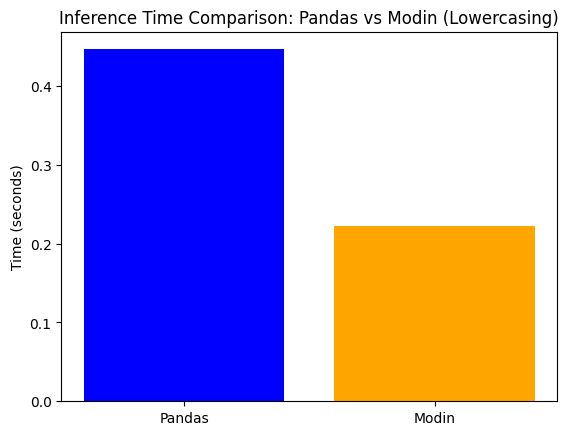

In [ ]:
import pandas as pd
import modin.pandas as mpd
import time
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/intel hackathon/squad_train.csv', encoding='unicode_escape')
data.drop_duplicates(keep='first', inplace=True)

df = data[['prompt', 'response']]
df = df.rename(columns={'prompt': 'document', 'response': 'summary'})
df = df.dropna()
df['document'] = df['document'].apply(lambda x: x.lower())
df['summary'] = df['summary'].apply(lambda x: x.lower())

# Function to measure inference time
def measure_time(func, *args, num_iterations=10):
    start_time = time.time()
    for _ in range(num_iterations):
        func(*args)
    end_time = time.time()
    return (end_time - start_time) / num_iterations

# Measure inference time for pandas
pandas_time = measure_time(lambda df: df['document'].apply(lambda x: x.lower()), df)

# Convert the dataframe to modin dataframe
modin_df = mpd.DataFrame(df)

# Measure inference time for modin.pandas
modin_time = measure_time(lambda df: df['document'].apply(lambda x: x.lower()), modin_df)

# Visual representation
labels = ['Pandas', 'Modin']
times = [pandas_time, modin_time]

plt.bar(labels, times, color=['blue', 'orange'])
plt.ylabel('Time (seconds)')
plt.title('Inference Time Comparison: Pandas vs Modin (Lowercasing)')
plt.show()

In [ ]:
import pandas as pd
import modin.pandas as mpd
import time
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/intel hackathon/squad_train.csv', encoding='unicode_escape')
data.drop_duplicates(keep='first', inplace=True)

# Function to preprocess the entire dataset (all columns)
def preprocess_df(df):
    df['document'] = df['document'].apply(lambda x: x.lower())
    df['summary'] = df['summary'].apply(lambda x: x.lower())
    return df

# Measure inference time for pandas
pandas_time = measure_time(preprocess_df, data)

# Convert the dataframe to modin dataframe
modin_df = mpd.DataFrame(data)

# Measure inference time for modin.pandas
modin_time = measure_time(preprocess_df, modin_df)

# Get the number of rows in the dataset
num_rows = len(data)

# Visual representation
labels = ['Pandas', 'Modin']
times = [pandas_time, modin_time]

plt.bar(labels, times, color=['blue', 'orange'])
plt.ylabel('Time (seconds)')
plt.title(f'Inference Time Comparison: Pandas vs Modin (Lowercasing) for {num_rows} Rows')
plt.show()


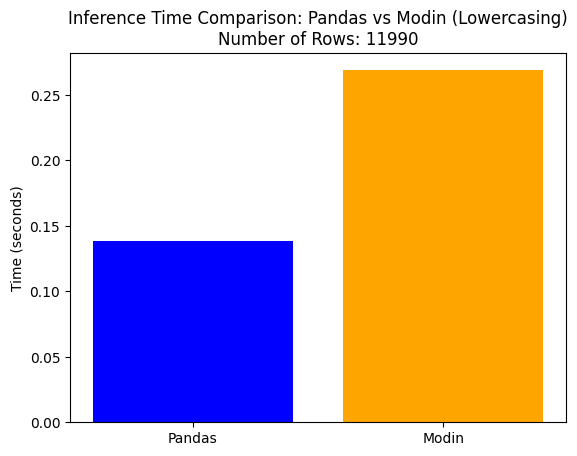

In [ ]:
import pandas as pd
import modin.pandas as mpd
import time
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/intel hackathon/squad_train.csv', encoding='unicode_escape')
data.drop_duplicates(keep='first', inplace=True)

df = data[['prompt', 'response']]
df = df.rename(columns={'prompt': 'document', 'response': 'summary'})
df = df.dropna()
df['document'] = df['document'].apply(lambda x: x.lower())
df['summary'] = df['summary'].apply(lambda x: x.lower())

# Function to measure inference time
def measure_time(func, *args, num_iterations=10):
    start_time = time.time()
    for _ in range(num_iterations):
        func(*args)
    end_time = time.time()
    return (end_time - start_time) / num_iterations

# Measure inference time for pandas
pandas_time = measure_time(lambda df: df['document'].apply(lambda x: x.lower()), df)

# Convert the dataframe to modin dataframe
modin_df = mpd.DataFrame(df)

# Measure inference time for modin.pandas
modin_time = measure_time(lambda df: df['document'].apply(lambda x: x.lower()), modin_df)

# Get the number of rows in the dataset
num_rows = len(df)

# Visual representation
labels = ['Pandas', 'Modin']
times = [pandas_time, modin_time]

plt.bar(labels, times, color=['blue', 'orange'])
plt.ylabel('Time (seconds)')
plt.title(f'Inference Time Comparison: Pandas vs Modin (Lowercasing)\nNumber of Rows: {num_rows}')
plt.show()


In [ ]:
df

,document,summary
0,appeal no. lxvi of 1949.\nappeal from the high...,the charge created in respect of municipal pro...
1,civil appeal no.94 of 1949.\n107 834 appeal fr...,"an agreement for a lease, which a lease is by ..."
2,"iminal appeal no. 40 of 1951, 127 appeal from ...","the question whether a magistrate is ""personal..."
3,appeal no. 388 of 1960.\nappeal by special lea...,the appellant was a member of a joint hindu fa...
4,appeal no. 198 of 1954.\nappeal from the judgm...,the appellant was the ruler of the state of ba...
...,...,...
30267,article 378a of indian constitution,special provision as to duration of andhra pra...
30268,article 392 of indian constitution,power of the president to remove difficulties\...
30269,article 393 of indian constitution,short title this constitution may be called th...
30270,article 394 of indian constitution,"commencement this article and articles 5, 6, 7..."


In [ ]:
!pip install datasets transformers rouge-score nltk -q


In [ ]:
import torch
import datasets
from datasets import Dataset
from datasets import load_metric

In [ ]:
from transformers import AutoTokenizer

model_checkpoint ='t5-small'

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

pad_on_right = tokenizer.padding_side == "right"

In [ ]:
max_input_length = 6500
max_target_length = 500


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
train = df[:3350]
valid = df[3350:3690]
test = df[3690:]
train.shape, valid.shape,test.shape

In [ ]:
def preprocess_function(examples):
    inputs = ['summarize:' + doc for doc in examples["document"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True,padding='max_length')

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["summary"], max_length=max_target_length, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
import torch
import datasets
from datasets import Dataset

train = Dataset.from_pandas(train)
valid = Dataset.from_pandas(valid)

In [ ]:
tokenized_train = train.map(preprocess_function, batched=True)
tokenized_valid = valid.map(preprocess_function, batched=True)

finetunning


In [ ]:
import transformers
assert isinstance(tokenizer, transformers.PreTrainedTokenizerFast)

In [ ]:
# from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, TrainingArguments, Trainer

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)


In [ ]:
batch_size = 1
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
import nltk
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    # Extract a few results
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}

    # Add mean generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
import gc
gc.collect()

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
#DEVICE ="cpu"
# print("[INFO] training using {}".format(torch.cuda.get_device_name(0)))
#print('There are %d GPU(s) available.' % torch.cuda.device_count())

In [ ]:
torch.cuda.empty_cache()

In [ ]:
%env WANDB_DISABLED=True


In [ ]:
# !pip install accelerate -U

In [ ]:
# !pip install transformers[torch]

In [ ]:
# import accelerate
# print(accelerate.__version__)

In [ ]:
# !pip uninstall torch torchvision -y
# !pip install torch==1.8.1 torchvision==0.9.1 torchtext==0.9.0


In [ ]:
# !pip install accelerate
# !pip install transformers -U


In [ ]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    output_dir=f"{model_name}-finetuned-Summarizer",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=5,
    gradient_accumulation_steps=2,
    fp16=True
)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_valid,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
metric = load_metric("rouge")


In [ ]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb=10'

In [ ]:
trainer.train()

In [ ]:
# trainer.save_model("")


In [ ]:
eval_dataset = Dataset.from_pandas(test)

In [ ]:
eval_dataset = eval_dataset.map(
                preprocess_function,
                batched=True)

In [ ]:
predict_results = trainer.predict(
            eval_dataset,max_length=128, num_beams=3)

In [ ]:
metrics = predict_results.metrics

In [ ]:
if args.predict_with_generate:
    predictions = tokenizer.batch_decode(predict_results.predictions, skip_special_tokens=True, clean_up_tokenization_spaces=True)
    predictions = [pred.strip() for pred in predictions]

In [ ]:
predictions[:2]

In [ ]:
test['summary'][:2]